In [ ]:
# %env CUBLAS_WORKSPACE_CONFIG=:4096:8

In [1]:
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [1]:
from main_multi import *
# from torchsummary import summary
import wandb

Args:
Namespace(augment=3, batch_size=128, burn_in=10, c_threshold=0.7, corruption_ratio=0.0, corruption_type=None, dataset='cifar10', device='cuda', imbalanced_factor=None, innerepochs=1, interval=1, loss_p=0.75, lr=0.1, max_epoch=100, meta_lr=0.001, meta_method='MAML', meta_net_hidden_size=80, meta_net_num_layers=0, meta_weight_decay=0.0, momentum=0.9, num_consistency=5, num_meta=1000, num_workers=0, plot_interval=10, seed=1, semi='mixlabel', semi_beta=1.0, semi_p=0.3, threshlod=-1, weight_decay=0.0005)


In [ ]:
# !wandb login b729ef7d624d9a61a7ff0f8b7dddeae0b138e8d9

In [2]:
hyperparameter = {
    'dataset':'cifar10',
    'model':'resnet32',
    'milestone':[80,90],
    'num_meta':1000,
    'imbalanced_factor':200,
    'corruption_type':None,
    'corruption_ratio':0,
    'batch_size':128,
    'max_epoch':150,
    # 'device':"cuda" if torch.cuda.is_available() else "cpu",
    'device':'cuda',
    'seed': 1, # 
    'meta_net_hidden_size':96,
    'meta_net_num_layers':1,
    'lr':0.1,
    'weight_decay':5e-4,
    'momentum':0.9,
    'meta_lr':1e-5,
    'meta_weight_decay':0.,
    'meta_method':'MAML',
    'innerepochs':1,
    'inner_lr':0.1,
    'interval':1,
    'plot_interval':10,
    'burn_in':80,

    'threshold':0,
    'c_threshold':0.7,
    'semi':'consistency',
    'semi_p':0.2,
    'semi_beta':1.0,
    'loss_p': 0.75,

    'num_workers':0,
    'augment':2,
    'num_consistency':5,
}

In [3]:
# wandb.init(project="imbalance", entity="ruistarlit", config=hyperparameter)
wandb.init(project="my-test-project", entity="ruistarlit", config=hyperparameter, mode="disabled")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [4]:
Model = TrainNet(wandb.config)
# Model = TrainNet(args)
# print('DNN Model: vvvvvvvvv')
# summary(Model.model,(3,32,32))
# print('Meta-Net:  vvvvvvvvvvvv')
# summary(Model.meta_net, (1,1))

In [5]:
Model.train(1)

Files already downloaded and verified
4900
[1509, 24, 143, 465, 4900, 837, 2719, 79, 44, 258]
[Main] Training.... 


  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
Model.load('checkpoint/CheckPoint-_05-01_21-01.pth.tar')

[Load] Acc:0.8764|Epoch:100|Lr:0.0010000000000000002


In [6]:
test_loss, test_acc, confusion = Model.test()

[Test] Loss:0.424156| Acc:0.8764


In [7]:
confusion

array([[0.933, 0.005, 0.014, 0.004, 0.007, 0.002, 0.008, 0.   , 0.016,
        0.011],
       [0.015, 0.911, 0.   , 0.003, 0.001, 0.   , 0.002, 0.001, 0.009,
        0.058],
       [0.053, 0.   , 0.765, 0.025, 0.065, 0.029, 0.055, 0.004, 0.002,
        0.002],
       [0.015, 0.001, 0.022, 0.744, 0.052, 0.113, 0.039, 0.008, 0.003,
        0.003],
       [0.005, 0.   , 0.006, 0.009, 0.953, 0.009, 0.01 , 0.006, 0.001,
        0.001],
       [0.002, 0.   , 0.014, 0.07 , 0.028, 0.863, 0.011, 0.011, 0.001,
        0.   ],
       [0.003, 0.   , 0.01 , 0.011, 0.014, 0.004, 0.955, 0.001, 0.001,
        0.001],
       [0.019, 0.   , 0.01 , 0.018, 0.057, 0.065, 0.004, 0.826, 0.   ,
        0.001],
       [0.076, 0.011, 0.002, 0.01 , 0.002, 0.001, 0.004, 0.   , 0.877,
        0.017],
       [0.021, 0.028, 0.001, 0.004, 0.   , 0.004, 0.   , 0.   , 0.005,
        0.937]])

In [39]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("显示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('显示具体数字：')
        print(cm)
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, cmap=cmap)
    plt.title(title,fontsize=20)
    plt.colorbar()
    # tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
    # matplotlib版本问题，如果不加下面这行代码，则绘制的混淆矩阵上下只能显示一半，有的版本的matplotlib不需要下面的代码，分别试一下即可
#     plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if f'{cm[i,j]:.2f}%' != '0.00%':
            plt.text(j, i, f'{cm[i,j]:.2f}%',
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black",fontsize=13)
    plt.ylabel('True label',fontsize=16)
    plt.xlabel('Predicted label',fontsize=16)
    plt.show()

显示具体数字：
[[0.933 0.005 0.014 0.004 0.007 0.002 0.008 0.    0.016 0.011]
 [0.015 0.911 0.    0.003 0.001 0.    0.002 0.001 0.009 0.058]
 [0.053 0.    0.765 0.025 0.065 0.029 0.055 0.004 0.002 0.002]
 [0.015 0.001 0.022 0.744 0.052 0.113 0.039 0.008 0.003 0.003]
 [0.005 0.    0.006 0.009 0.953 0.009 0.01  0.006 0.001 0.001]
 [0.002 0.    0.014 0.07  0.028 0.863 0.011 0.011 0.001 0.   ]
 [0.003 0.    0.01  0.011 0.014 0.004 0.955 0.001 0.001 0.001]
 [0.019 0.    0.01  0.018 0.057 0.065 0.004 0.826 0.    0.001]
 [0.076 0.011 0.002 0.01  0.002 0.001 0.004 0.    0.877 0.017]
 [0.021 0.028 0.001 0.004 0.    0.004 0.    0.    0.005 0.937]]


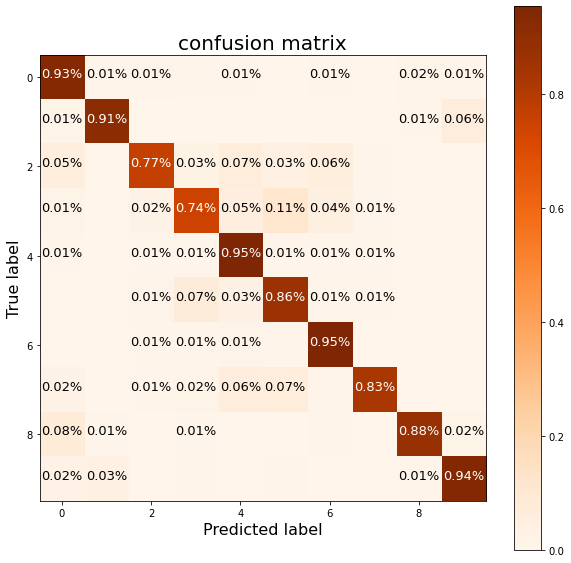

In [40]:
plot_confusion_matrix(confusion, classes=10, normalize=False, title='confusion matrix')

In [5]:
Model.train(100)

Files already downloaded and verified
[2054, 98, 361, 861, 4900, 1330, 3172, 233, 151, 557]
[Main] Training.... 


  0%|          | 0/100 [00:00<?, ?it/s]



[Train:1] Train loss:0.4281 acc:0.4944|Test loss:2.9521 acc:0.2171


[Train:2] Train loss:0.3704 acc:0.5929|Test loss:2.6387 acc:0.2989


[Train:3] Train loss:0.3348 acc:0.6421|Test loss:2.1193 acc:0.3519


[Train:4] Train loss:0.3147 acc:0.6728|Test loss:2.2883 acc:0.3445


[Train:5] Train loss:0.3020 acc:0.6926|Test loss:2.0915 acc:0.3860


[Train:6] Train loss:0.2978 acc:0.7095|Test loss:2.2394 acc:0.3731


[Train:7] Train loss:0.2902 acc:0.7268|Test loss:1.6387 acc:0.4410


[Train:8] Train loss:0.2921 acc:0.7367|Test loss:2.1264 acc:0.3919


[Train:9] Train loss:0.2987 acc:0.7488|Test loss:1.6419 acc:0.4486


[Train:10] Train loss:0.2961 acc:0.7634|Test loss:1.4970 acc:0.4878


[Train:11] Train loss:0.3115 acc:0.7639|Test loss:1.7047 acc:0.4581


[Train:12] Train loss:0.3199 acc:0.7754|Test loss:1.3135 acc:0.5558


[Train:13] Train loss:0.3250 acc:0.7841|Test loss:1.6786 acc:0.5094


[Train:14] Train loss:0.3471 acc:0.7830|Test loss:1.5931 acc:0.5021


[Train:15] Train loss:0.366

In [6]:
Model.train(80, ckp=40)

Files already downloaded and verified
[[0.6 0.  0.  ... 0.  0.  0. ]
 [0.  0.6 0.  ... 0.  0.  0. ]
 [0.  0.  0.6 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.6 0.  0. ]
 [0.  0.  0.  ... 0.  0.6 0. ]
 [0.  0.  0.  ... 0.  0.  0.6]]
[Main] Training.... 


  0%|          | 0/80 [00:00<?, ?it/s]



[Train:41] Train loss:2.1841 acc:0.3454|Test loss:2.5105 acc:0.3213


[Train:42] Train loss:2.1567 acc:0.3488|Test loss:2.4049 acc:0.3442


[Train:43] Train loss:2.1655 acc:0.3486|Test loss:2.4615 acc:0.3383


[Train:44] Train loss:2.1467 acc:0.3521|Test loss:2.5609 acc:0.3146


[Train:45] Train loss:2.1238 acc:0.3561|Test loss:2.4357 acc:0.3362


[Train:46] Train loss:2.1368 acc:0.3555|Test loss:2.4938 acc:0.3538


[Train:47] Train loss:2.1226 acc:0.3535|Test loss:2.4333 acc:0.3356


[Train:48] Train loss:2.0997 acc:0.3636|Test loss:2.4728 acc:0.3470


[Train:49] Train loss:2.1032 acc:0.3600|Test loss:2.4226 acc:0.3666


[Train:50] Train loss:2.0956 acc:0.3612|Test loss:2.5109 acc:0.3290


[Train:51] Train loss:2.0717 acc:0.3663|Test loss:2.4815 acc:0.3297


[Train:52] Train loss:2.0817 acc:0.3648|Test loss:2.4122 acc:0.3514


[Train:53] Train loss:2.0649 acc:0.3686|Test loss:2.4925 acc:0.3341


[Train:54] Train loss:2.0511 acc:0.3726|Test loss:2.5439 acc:0.3343


[Train:55] Train l

KeyboardInterrupt: 

In [ ]:
Model.train

In [ ]:
if wandb.run is not None:
    wandb.finish()